In [3]:
!pip install folium

     |████████████████████████████████| 102 kB 5.6 MB/s ta 0:00:011


In [2]:
import folium

## 자치구

In [3]:
import pandas as pd

In [4]:
df_gu = pd.read_csv('자치구별데이터통합.csv',encoding='cp949')
pd.set_option('display.max_columns', None)
df_gu.columns

Index(['자치구', '총 자동차 합계', '관용 합계', '자가용 합계', '영업용 합계', '승용차 합계', '승용차 관용',
       '승용차 자가용', '승용차 영업용', '승합차 합계', '승합차 관용', '승합차 자가용', '승합차 영업용',
       '화물차 합계', '화물차 관용', '화물차 자가용', '화물차 영업용', '특수차 합계', '특수차 관용', '특수차 자가용',
       '특수차 영업용', '이륜차 합계', '이륜차 관용', '이륜차 자가용', '이륜차 영업용', '자동차 등록 대수',
       '주차 면수', '주차장 확보율', '자동차등록대수(증감)', '주차면수(증감)', '주차장확보율(증감)',
       '자가용 승용차 합계', '주택가 주차장 합계', '주택가 주차장 노상', '주택가 주차장 노외',
       '주택가 주차장 건축물 부설', '주택가 주차장 확보율', '2017 단속건수', '2018 단속건수', '2019 단속건수',
       '2020 단속건수', '2021 단속건수', '2022 단속건수', '총 세대수', '총 인구수', '세대당인구',
       '총 예산', '주차장사업비', '순이동', '총상주인구(명)', '총유입인구(명)', '통근_유입인구(명)',
       '통학_유입인구(명)', '총유출인구(명)', '통근_유출인구(명)', '통학_유출인구(명)', '총주간인구(명)',
       '주간인구지수(%)', '택시운송업', '한식_일반_음식점업', '용달_화물자동차_운송업', '부동산_중개_및_대리업',
       '두발미용업', '커피전문점', '기타_주점업', '남녀용_겉옷_및_셔츠_도매업', '일반_교과_학원',
       '한식_육류요리_전문점', '총상권개수'],
      dtype='object')

In [5]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/PinkWink/DataScience/master/data/02.%20skorea_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c, encoding='UTF-8')

<ipython-input-5-1443c79a2fab>:7: DeprecationWarning: 'encoding' is ignored and deprecated. It will be removed in Python 3.9
  seoul_geo = json.loads(c, encoding='UTF-8')


In [6]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=10, 
    tiles='cartodbpositron'
)

In [7]:
folium.GeoJson(
    seoul_geo,
    name='자치구'
).add_to(m)

In [8]:
folium.Choropleth(
    geo_data=seoul_geo, # 경계선 좌표값이 담긴 데이터
    data=df_gu, # Series or DataFrame 넣으면 된다
    columns=['자치구', '특수차 자가용'], # DataFrame의 어떤 columns을 넣을지
    key_on='feature.id', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color='YlOrRd',
    fill_opacity=0.5, # 색 투명도
    line_opacity=0.5, # 선 투명도
    legend_name='자가용 특수차' # 범례
).add_to(m)

In [9]:
folium.Marker([37.55981328950346,126.823507947340602],
                    popup="서울특별시 강서구", 
                    tooltip='강서구').add_to(m)
m

## 행정동

In [10]:
df_dong = pd.read_csv('행정동별데이터지도용.csv',encoding='cp949')
pd.set_option('display.max_columns', None)
df_dong.columns

Index(['행정동', '주차장 개수', '주차장 면수', '공영 개수', '공영 면수', '민영 개수', '민영 면수', '노상 개수',
       '노상 면수', '노상 시영 개수', '노상 시영 면수', '노상 구영 개수', '노상 구영 면수', '노외 개수',
       '노외 면수', '노외 시영 개수', '노외 시영 면수', '노외 구영 개수', '노외 구영 면수', '노외 민영 개수',
       '노외 민영 면수', '건축물부설 개수', '건축물부설 면수', '건축물부설 일반주택 개수', '건축물부설 일반주택 면수',
       '건축물부설 공동주택 개수', '건축물부설 공동주택 면수', '건축물부설 일반건축물 개수', '건축물부설 일반건축물 면수',
       '공영주차장 수', '공영주차장 총 주차면', '승용', '승합', '특수', '화물', '자동차등록대수', '단속건수',
       '승차총승객수', '하차총승객수', '순이동', '사업체수', '종사자수', '농업 임업 및 어업', '광업', '제조업',
       '전기 가스 증기 및 공기조절 공급업', '수도 하수 및 폐기물 처리 원료 재생업', '건설업', '도매 및 소매업',
       '운수 및 창고업', '숙박 및 음식점업', '정보통신업', '금융 및 보험업', '부동산업', '전문 과학 및 기술 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정', '교육 서비스업',
       '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업', '협회 및 단체 수리 및 기타 개인 서비스업',
       '택시운송업', '버스승차총승객수', '버스하차총승객수', '총상권개수'],
      dtype='object')

In [11]:
r = requests.get('https://raw.githubusercontent.com/vuski/admdongkor/master/ver20230101/HangJeongDong_ver20230101.geojson')
c = r.content
seoul_dong = json.loads(c,encoding='UTF-8')

<ipython-input-11-dbc1598d70e9>:3: DeprecationWarning: 'encoding' is ignored and deprecated. It will be removed in Python 3.9
  seoul_dong = json.loads(c,encoding='UTF-8')


In [12]:
seoul_dong = json.load(open('강서구.geojson',encoding='UTF-8'))

In [13]:
m = folium.Map(
    location=[37.55981328950346,126.823507947340602],
    zoom_start=12, 
    tiles='Stamen Terrain',
)

In [14]:
folium.GeoJson(
    seoul_dong,
    name='행정동',
    style_function = lambda x: {'fillColor':'#00000000' ,
    							'color':'grey',
                                'weight' :'2'
                               }
).add_to(m)

In [15]:
folium.Choropleth(
    geo_data=seoul_dong, # 경계선 좌표값이 담긴 데이터
    data=df_dong, # Series or DataFrame 넣으면 된다
    columns=['행정동', '단속건수'], # DataFrame의 어떤 columns을 넣을지
    key_on='feature.properties.adm_nm', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color='YlOrRd',
    fill_opacity=0.5, # 색 투명도
    line_opacity=0.5, # 선 투명도
    legend_name='단속 건 수' # 범례
).add_to(m)
m

In [16]:
df_dong['행정동']

0      서울특별시 강서구 염창동
1     서울특별시 강서구 등촌1동
2     서울특별시 강서구 등촌2동
3     서울특별시 강서구 등촌3동
4     서울특별시 강서구 화곡본동
5     서울특별시 강서구 화곡2동
6     서울특별시 강서구 화곡3동
7     서울특별시 강서구 화곡4동
8     서울특별시 강서구 화곡6동
9     서울특별시 강서구 화곡8동
10    서울특별시 강서구 가양1동
11    서울특별시 강서구 가양2동
12    서울특별시 강서구 가양3동
13    서울특별시 강서구 발산1동
14     서울특별시 강서구 공항동
15    서울특별시 강서구 방화1동
16    서울특별시 강서구 방화2동
17    서울특별시 강서구 방화3동
18    서울특별시 강서구 화곡1동
19    서울특별시 강서구 우장산동
Name: 행정동, dtype: object

## 클러스터링

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import warnings
warnings.filterwarnings("ignore")

In [28]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['figure.max_open_warning'] = 50
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [18]:
df_dong = df_dong.drop('광업', axis=1)

In [19]:
target = '행정동'
y = df_dong[target]
x = df_dong.drop(target, axis=1)

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(random_state=1, n_components=2)

x = StandardScaler().fit_transform(x)

model = pca.fit(x)

In [21]:
print('성분 별 설명 정도 : ', model.explained_variance_ratio_)
print('총 설명도 : ', sum(model.explained_variance_ratio_))

성분 별 설명 정도 :  [0.41322341 0.21237963]
총 설명도 :  0.625603044321623


In [22]:
x_pca = model.transform(x)
x_pca_df = pd.DataFrame(x_pca)
x_pca_df['행정동명'] = y

In [23]:
x_pca_df.columns = ['component 1', 'component 2', '행정동명']
x_pca_df

,component 1,component 2,행정동명
0,0.609569,-4.201477,서울특별시 강서구 염창동
1,-1.739200,-2.520135,서울특별시 강서구 등촌1동
2,-4.487493,-0.052643,서울특별시 강서구 등촌2동
3,-0.007676,-3.393630,서울특별시 강서구 등촌3동
4,-0.698843,2.543586,서울특별시 강서구 화곡본동
5,-4.788195,2.166217,서울특별시 강서구 화곡2동
6,-3.498870,0.142446,서울특별시 강서구 화곡3동
7,-2.899969,3.071727,서울특별시 강서구 화곡4동
8,0.117807,3.850146,서울특별시 강서구 화곡6동
9,-2.531524,1.669028,서울특별시 강서구 화곡8동


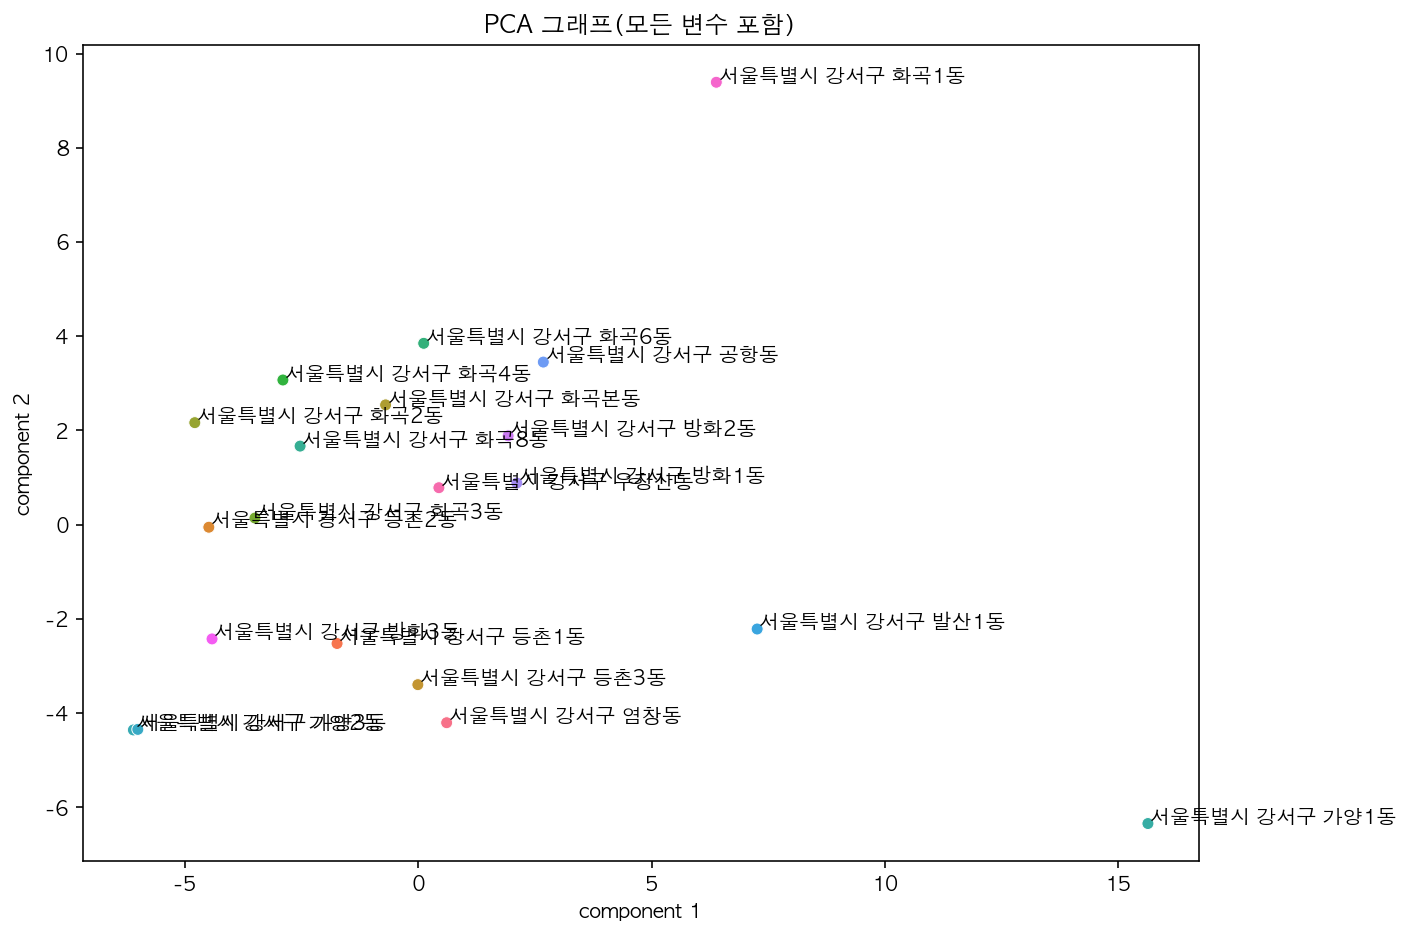

In [29]:
x_label = x_pca_df.iloc[:,0]
y_label = x_pca_df.iloc[:,1]
label = x_pca_df.iloc[:,2]

plt.figure(figsize=(10,7.5))

ax = sns.scatterplot(x='component 1', y='component 2', data=x_pca_df, hue='행정동명', legend=False)
#sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.1,1))

for i, label in enumerate(label):
    if label in ['공항동', '가양1동', '가양2동', '발산1동', '화곡1동']:
        ax.add_patch(patches.Circle((x_label[i], y_label[i]), radius=0.19, edgecolor='red', linewidth=2, fill=False))
    plt.text(x_label[i] + 0.05, y_label[i], label)

plt.title('PCA 그래프(모든 변수 포함)')
plt.show()

In [30]:
import scipy.stats as spst

In [46]:
result = {'상관계수' : [], 'p-value' : []}

y_stat = df_dong['단속건수']
x_stat = df_dong.drop(['행정동', '단속건수'], axis=1)

for i in range(len(x_stat.columns)):
    stat = spst.pearsonr(x=df_dong[x_stat.columns[i]], y=df_dong['단속건수'])
    result['상관계수'].append(stat[0])
    result['p-value'].append(stat[1])

In [47]:
result = pd.DataFrame(result, index=x_stat.columns)
result = result.drop(['농업 임업 및 어업'],axis=0)

In [48]:
# 단속건수에 0.5 이상의 상관관계, 유의한 p-value
result[result['상관계수'] >= 0.5]

,상관계수,p-value
주차장 면수,0.552940,0.011450
민영 면수,0.552937,0.011451
건축물부설 면수,0.555126,0.011062
건축물부설 일반주택 면수,0.500886,0.024475
건축물부설 일반건축물 면수,0.593427,0.005812
승합,0.549217,0.012137
특수,0.702512,0.000553
화물,0.585682,0.006661
종사자수,0.587708,0.006430
공공행정 국방 및 사회보장 행정,0.561668,0.009962


In [49]:
idx = list(result[result['상관계수'] >= 0.5].index)

In [61]:
idx.append('단속건수')
idx

['주차장 면수',
 '민영 면수',
 '건축물부설 면수',
 '건축물부설 일반주택 면수',
 '건축물부설 일반건축물 면수',
 '승합',
 '특수',
 '화물',
 '종사자수',
 '공공행정 국방 및 사회보장 행정',
 '단속건수']

In [62]:
data = df_dong[idx]
data.index = df_dong['행정동']
data

,주차장 면수,민영 면수,건축물부설 면수,건축물부설 일반주택 면수,건축물부설 일반건축물 면수,승합,특수,화물,종사자수,공공행정 국방 및 사회보장 행정,단속건수
행정동,,,,,,,,,,,
서울특별시 강서구 염창동,20668,20543,20543,118,8126,316,24,1296,16227,2,7495
서울특별시 강서구 등촌1동,13600,13386,13386,236,8891,292,23,876,17753,3,6341
서울특별시 강서구 등촌2동,9611,9357,9357,758,1686,169,11,619,3972,4,1888
서울특별시 강서구 등촌3동,17670,17520,17344,39,9503,278,17,756,20336,3,2824
서울특별시 강서구 화곡본동,12732,12195,12180,1021,2699,323,14,949,4919,2,4098
서울특별시 강서구 화곡2동,6412,5899,5899,595,1105,210,13,604,2827,1,3829
서울특별시 강서구 화곡3동,9879,9575,9545,683,1600,153,19,555,4397,2,4245
서울특별시 강서구 화곡4동,8090,7714,7696,1062,1641,219,15,755,4315,2,5120
서울특별시 강서구 화곡6동,14487,13783,13731,753,5653,235,11,772,12040,6,5820


In [63]:
data1 = data.loc[['서울특별시 강서구 가양2동', '서울특별시 강서구 가양3동', '서울특별시 강서구 화곡2동', '서울특별시 강서구 화곡3동', '서울특별시 강서구 화곡4동', '서울특별시 강서구 화곡8동', '서울특별시 강서구 화곡본동', '서울특별시 강서구 등촌2동', '서울특별시 강서구 방화3동'], :]
data2 = data.loc[['서울특별시 강서구 화곡1동', '서울특별시 강서구 화곡6동', '서울특별시 강서구 등촌1동', '서울특별시 강서구 등촌3동', '서울특별시 강서구 방화1동', '서울특별시 강서구 방화2동', '서울특별시 강서구 염창동', '서울특별시 강서구 우장산동'], :]
data3 = data.loc[['서울특별시 강서구 발산1동', '서울특별시 강서구 가양1동', '서울특별시 강서구 공항동'], :]

In [64]:
data1['label'] = 0
data2['label'] = 1
data3['label'] = 2

In [72]:
data1

,주차장 면수,민영 면수,건축물부설 면수,건축물부설 일반주택 면수,건축물부설 일반건축물 면수,승합,특수,화물,종사자수,공공행정 국방 및 사회보장 행정,단속건수,label
행정동,,,,,,,,,,,,
서울특별시 강서구 가양2동,5314,5114,5114,0,1836,139,4,358,3352,2,13315,0
서울특별시 강서구 가양3동,5567,5435,5435,0,2423,174,6,562,7941,2,1801,0
서울특별시 강서구 화곡2동,6412,5899,5899,595,1105,210,13,604,2827,1,3829,0
서울특별시 강서구 화곡3동,9879,9575,9545,683,1600,153,19,555,4397,2,4245,0
서울특별시 강서구 화곡4동,8090,7714,7696,1062,1641,219,15,755,4315,2,5120,0
서울특별시 강서구 화곡8동,8322,7801,7789,771,1265,186,22,677,4385,1,3628,0
서울특별시 강서구 화곡본동,12732,12195,12180,1021,2699,323,14,949,4919,2,4098,0
서울특별시 강서구 등촌2동,9611,9357,9357,758,1686,169,11,619,3972,4,1888,0
서울특별시 강서구 방화3동,8603,8310,8310,222,1915,273,19,669,4689,4,2714,0


In [65]:
df = pd.concat([data1,data2],axis=0)
df = pd.concat([df,data3],axis=0)

In [66]:
df

,주차장 면수,민영 면수,건축물부설 면수,건축물부설 일반주택 면수,건축물부설 일반건축물 면수,승합,특수,화물,종사자수,공공행정 국방 및 사회보장 행정,단속건수,label
행정동,,,,,,,,,,,,
서울특별시 강서구 가양2동,5314,5114,5114,0,1836,139,4,358,3352,2,13315,0
서울특별시 강서구 가양3동,5567,5435,5435,0,2423,174,6,562,7941,2,1801,0
서울특별시 강서구 화곡2동,6412,5899,5899,595,1105,210,13,604,2827,1,3829,0
서울특별시 강서구 화곡3동,9879,9575,9545,683,1600,153,19,555,4397,2,4245,0
서울특별시 강서구 화곡4동,8090,7714,7696,1062,1641,219,15,755,4315,2,5120,0
서울특별시 강서구 화곡8동,8322,7801,7789,771,1265,186,22,677,4385,1,3628,0
서울특별시 강서구 화곡본동,12732,12195,12180,1021,2699,323,14,949,4919,2,4098,0
서울특별시 강서구 등촌2동,9611,9357,9357,758,1686,169,11,619,3972,4,1888,0
서울특별시 강서구 방화3동,8603,8310,8310,222,1915,273,19,669,4689,4,2714,0


In [70]:
m = folium.Map(
    location=[37.55981328950346,126.823507947340602],
    zoom_start=12, 
    tiles='cartodbpositron',
)

folium.GeoJson(
    seoul_dong,
    name='행정동',
    style_function = lambda x: {'fillColor':'#00000000' ,
    							'color':'grey',
                                'weight' :'2'
                               }
).add_to(m)

folium.Choropleth(
    geo_data=seoul_dong, # 경계선 좌표값이 담긴 데이터
    data=df, # Series or DataFrame 넣으면 된다
    columns=[df.index, 'label'], # DataFrame의 어떤 columns을 넣을지
    key_on='feature.properties.adm_nm', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color='PuBu',
    fill_opacity=0.7, # 색 투명도
    line_opacity=1.0, # 선 투명도
    legend_name='label' # 범례
).add_to(m)
m

In [88]:
m = folium.Map(
    location=[37.55981328950346,126.823507947340602],
    zoom_start=12, 
    tiles='cartodbpositron',
)

folium.GeoJson(
    seoul_dong,
    name='행정동',
    style_function = lambda x: {'fillColor':'#000000' ,
    							'color':'black',
                                'weight' :'2'
                               }
).add_to(m)

folium.Choropleth(
    geo_data=seoul_dong, # 경계선 좌표값이 담긴 데이터
    data=data1, # Series or DataFrame 넣으면 된다
    columns=[data1.index, '단속건수'], # DataFrame의 어떤 columns을 넣을지
    key_on='feature.properties.adm_nm', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color='BuGn',
    fill_opacity=0.7, # 색 투명도
    line_opacity=1.0, # 선 투명도
    legend_name='단속 건 수' # 범례
).add_to(m)
m

In [84]:
print('발산1동', '가양1동', '공항동')

발산1동 가양1동 공항동


In [87]:
m = folium.Map(
    location=[37.55981328950346,126.823507947340602],
    zoom_start=12, 
    tiles='cartodbpositron',
)

folium.GeoJson(
    seoul_dong,
    name='행정동',
    style_function = lambda x: {'fillColor':'#00000000' ,
    							'color':'grey',
                                'weight' :'2'
                               }
).add_to(m)

folium.Choropleth(
    geo_data=seoul_dong, # 경계선 좌표값이 담긴 데이터
    data=data2, # Series or DataFrame 넣으면 된다
    columns=[data2.index, '단속건수'], # DataFrame의 어떤 columns을 넣을지
    key_on='feature.properties.adm_nm', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color='OrRd',
    fill_opacity=0.7, # 색 투명도
    line_opacity=1.0, # 선 투명도
    legend_name='단속 건 수' # 범례
).add_to(m)
m

In [86]:
m = folium.Map(
    location=[37.55981328950346,126.823507947340602],
    zoom_start=12, 
    tiles='cartodbpositron',
)

folium.GeoJson(
    seoul_dong,
    name='행정동',
    style_function = lambda x: {'fillColor':'#00000000' ,
    							'color':'grey',
                                'weight' :'2'
                               }
).add_to(m)

folium.Choropleth(
    geo_data=seoul_dong, # 경계선 좌표값이 담긴 데이터
    data=data3, # Series or DataFrame 넣으면 된다
    columns=[data3.index, '단속건수'], # DataFrame의 어떤 columns을 넣을지
    key_on='feature.properties.adm_nm', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color='PuRd',
    fill_opacity=0.7, # 색 투명도
    line_opacity=1.0, # 선 투명도
    legend_name='단속 건 수' # 범례
).add_to(m)
m